In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import pymongo



In [ ]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'classDB' database in Mongo
db = client.airlinesDB

In [ ]:
airlines=pd.read_csv("data/airlines.csv")

In [ ]:
airports=pd.read_csv("data/airports.csv")

In [ ]:
airport_names = airports.drop(columns=['CITY', 'STATE', 'COUNTRY', 'LATITUDE','LONGITUDE'])

In [ ]:
dict = airport_names.to_dict("records")

In [ ]:
air_dict=airlines.to_dict("records")

In [ ]:
db.airports.insert_many(dict)

In [ ]:
db.airlines.insert_many(air_dict)

In [2]:
# Study data files
Airline_path = "data/Fixed_flight.csv"

Airline = pd.read_csv(Airline_path, header=0,  index_col=0)

for column in Airline.columns:
    print(f"Column {column} has {Airline[column].isnull().sum()} null values")
    



Column MONTH has 0 null values
Column DAY has 0 null values
Column AIRLINE has 0 null values
Column ORIGIN_AIRPORT has 0 null values
Column DESTINATION_AIRPORT has 0 null values
Column SCHEDULED_ARRIVAL has 0 null values
Column ARRIVAL_DELAY has 70959 null values
Column DELAYED has 0 null values


In [3]:
Airline = Airline.dropna()
Airline

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DELAYED
0,1,1,AS,ANC,SEA,430,-22.0,0
1,1,1,AA,LAX,PBI,750,-9.0,0
2,1,1,US,SFO,CLT,806,5.0,1
3,1,1,AA,LAX,MIA,805,-9.0,0
4,1,1,AS,SEA,ANC,320,-21.0,0
...,...,...,...,...,...,...,...,...
2889507,6,30,UA,LAX,ORD,600,-8.0,0
2889508,6,30,UA,LAX,IAH,520,79.0,1
2889509,6,30,UA,PDX,IAH,608,107.0,1
2889510,6,30,UA,SEA,IAH,609,9.0,1


In [4]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818553 entries, 0 to 2889511
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   AIRLINE              object 
 3   ORIGIN_AIRPORT       object 
 4   DESTINATION_AIRPORT  object 
 5   SCHEDULED_ARRIVAL    int64  
 6   ARRIVAL_DELAY        float64
 7   DELAYED              int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 193.5+ MB


In [5]:
Airline.isna().sum()

MONTH                  0
DAY                    0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DELAYED                0
dtype: int64

In [6]:
Airline.describe()

,MONTH,DAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DELAYED
count,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
mean,3.573126e+00,1.562678e+01,1.497113e+03,6.001171e+00,3.912195e-01
std,1.703931e+00,8.704137e+00,5.036512e+02,4.065076e+01,4.880235e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00
25%,2.000000e+00,8.000000e+00,1.112000e+03,-1.300000e+01,0.000000e+00
50%,4.000000e+00,1.600000e+01,1.521000e+03,-4.000000e+00,0.000000e+00
75%,5.000000e+00,2.300000e+01,1.919000e+03,1.000000e+01,1.000000e+00
max,6.000000e+00,3.100000e+01,2.400000e+03,1.971000e+03,1.000000e+00


In [7]:
Airline.columns

Index(['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'DELAYED'],
      dtype='object')

In [8]:
Airline =Airline.sample(n=100000, random_state=42)

In [9]:
X_cat = Airline[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
X_num = Airline.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DELAYED'], axis=1)
X_num

,MONTH,DAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
1403210,3,31,2350,-1.0
2645160,6,16,1827,0.0
2171264,5,18,1608,-15.0
1326458,3,27,1342,-39.0
2845577,6,28,1301,-13.0
...,...,...,...,...
1658773,4,16,1940,-11.0
2554576,6,11,755,2.0
2814316,6,26,1310,5.0
4684,1,1,1252,-12.0


In [10]:
X_cat

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
1403210,US,CLT,BUF
2645160,UA,SAN,IAH
2171264,DL,ATL,LEX
1326458,UA,IAD,HNL
2845577,B6,JFK,PWM
...,...,...,...
1658773,AS,SJC,SEA
2554576,WN,SAN,SJC
2814316,WN,HOU,LAS
4684,US,DCA,BOS


In [11]:
# Catagorize all the non number data (Flight locations, Airlines)
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
1403210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2645160,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2171264,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1326458,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2845577,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658773,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2554576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2814316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Scale just the number data of the X-axis and add it to the catagorized dataframe as is.
# Make it your new X-axis with the Y-axis being delayed or not
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['DELAYED']

In [13]:
X.head()

,MONTH,DAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
1403210,-0.338246,1.768020,1.684400,-0.173380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2645160,1.421496,0.043024,0.648256,-0.148995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2171264,0.834916,0.273023,0.214383,-0.514763,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1326458,-0.338246,1.308021,-0.312604,-1.099992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2845577,1.421496,1.423021,-0.393831,-0.465994,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.isna().sum()

MONTH                      0
DAY                        0
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY              0
AIRLINE_AS                 0
                          ..
DESTINATION_AIRPORT_WRG    0
DESTINATION_AIRPORT_WYS    0
DESTINATION_AIRPORT_XNA    0
DESTINATION_AIRPORT_YAK    0
DESTINATION_AIRPORT_YUM    0
Length: 656, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Using AffinityPropgation to clean inf / nan values for logistic regression and following models to perform

import pandas as pd
from sklearn.cluster import AffinityPropagation


In [17]:
df = pd.DataFrame(Airline)

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [19]:
data = df.to_numpy()
print(data)

[[3 31 'US' ... 2350 -1.0 0]
 [6 16 'UA' ... 1827 0.0 0]
 [5 18 'DL' ... 1608 -15.0 0]
 ...
 [6 26 'WN' ... 1310 5.0 1]
 [1 1 'US' ... 1252 -12.0 0]
 [1 10 'AA' ... 1015 -19.0 0]]


# Logistic Regresssion

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [22]:

classifier.fit(X_train, y_train)

C:\Users\yaf_9\anaconda3\envs\PythonData38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9999333333333333
Testing Data Score: 0.9997


## Saving Logistic Regresssion Model To Use them External

In [24]:
# Save The Model
from joblib import dump, load
dump(classifier, 'model_logreg_20220817.joblib') 

['model_logreg_20220817.joblib']

In [25]:
# anotherway
import pickle
pickle.dump(classifier, open('model_logreg_20220817.pkl', 'wb'))


In [26]:
model_logr = load('model_logreg_20220817.joblib')

In [27]:
model_logr.score(X_test, y_test)

0.9997

# Random Forest Classifier

In [28]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
randomForestClass = RandomForestClassifier(random_state=42)
randomForestClass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

RandomForestClassifier score:  1.0


In [32]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
randomForestClass_scaled = RandomForestClassifier(random_state=42)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  1.0


## Saving randomforest Model To Use them External

In [33]:
from joblib import dump, load
dump(randomForestClass, 'model_Randfor_20220817.joblib')

['model_Randfor_20220817.joblib']

In [34]:
model_ranf = load('model_Randfor_20220817.joblib')

In [35]:
model_ranf.score(X_test, y_test)

1.0

# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[6084,    0],
       [   3, 3913]], dtype=int64)

In [37]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9997


## Saving Confusion Matrix Model To Use them External

# Plots

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [39]:
# Size for images
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

<AxesSubplot:>

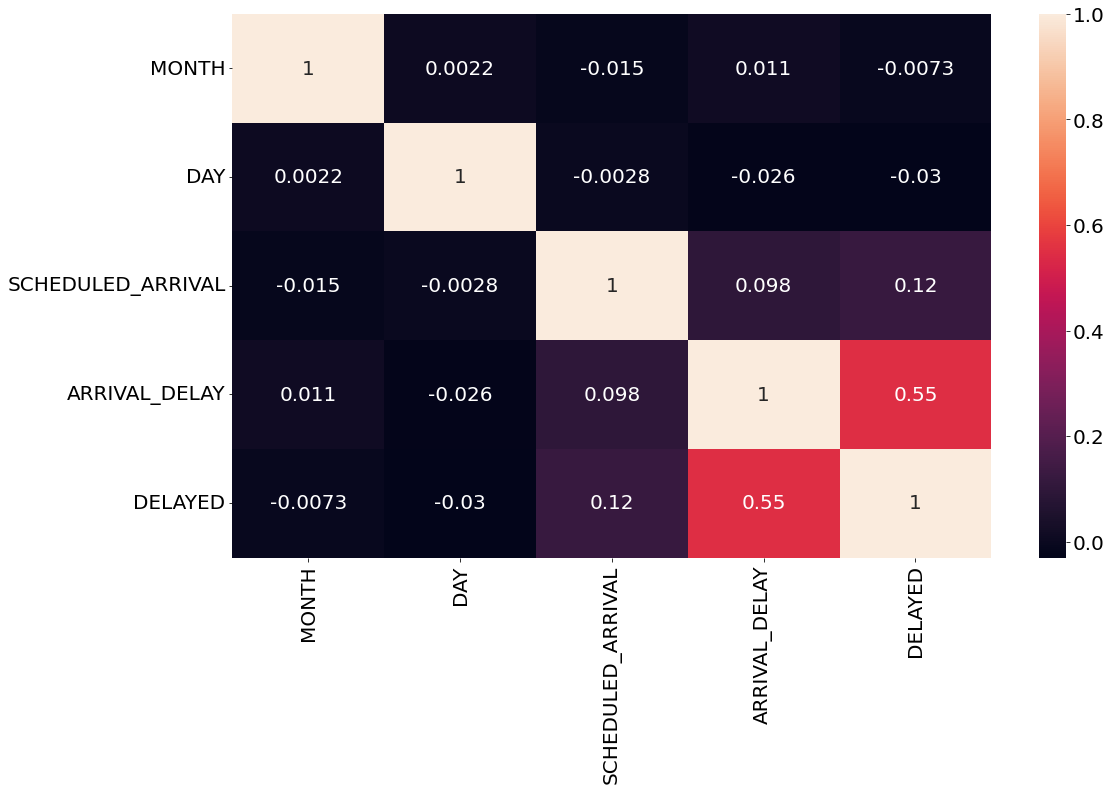

In [40]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='DAY', ylabel='count'>

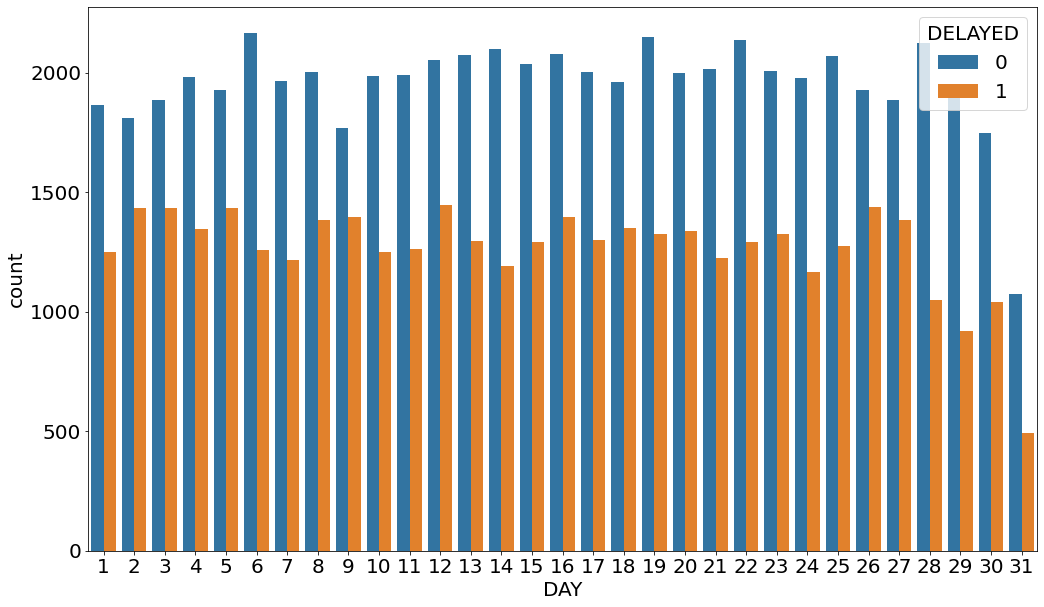

In [41]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')

<AxesSubplot:xlabel='AIRLINE', ylabel='count'>

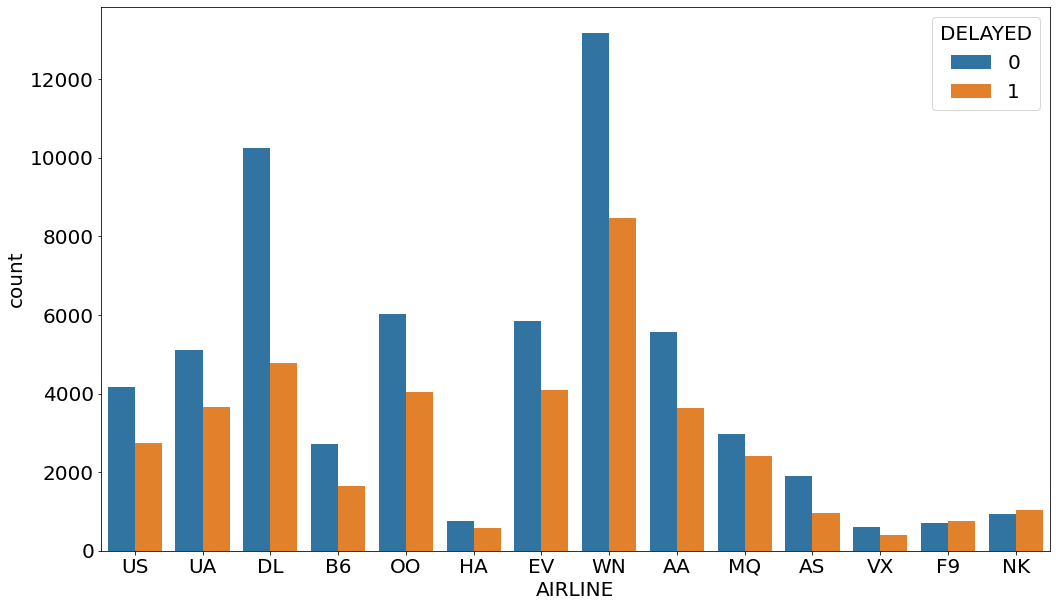

In [42]:
sns.countplot(data=df, x='AIRLINE', hue='DELAYED')

<AxesSubplot:xlabel='AIRLINE', ylabel='Count'>

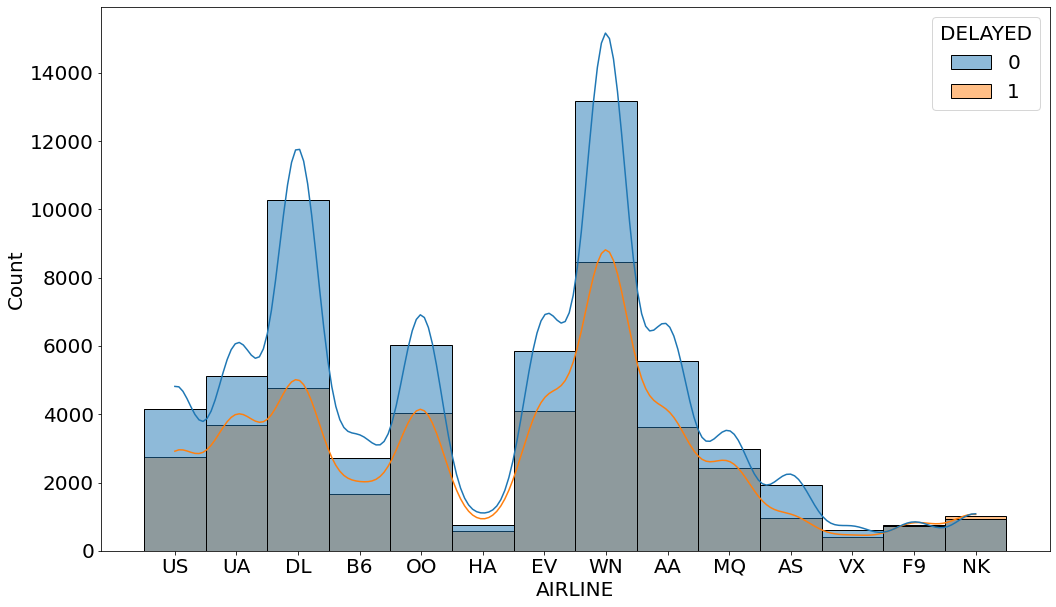

In [43]:
sns.histplot(data=Airline, x='AIRLINE', hue='DELAYED', kde=True)

<AxesSubplot:xlabel='DAY', ylabel='Count'>

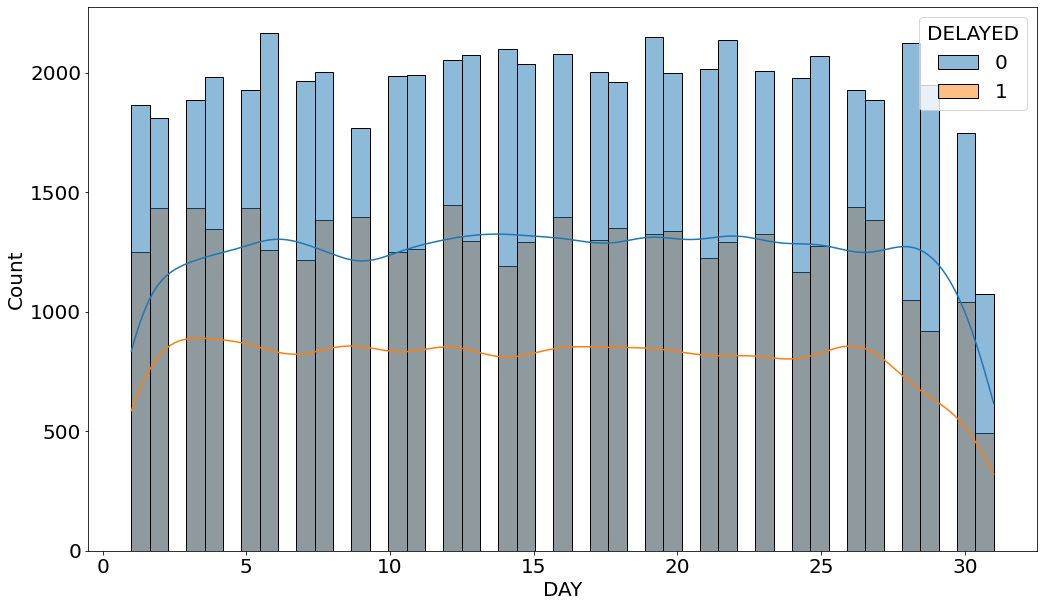

In [44]:
sns.histplot(data=Airline, x='DAY', hue='DELAYED', kde=True)

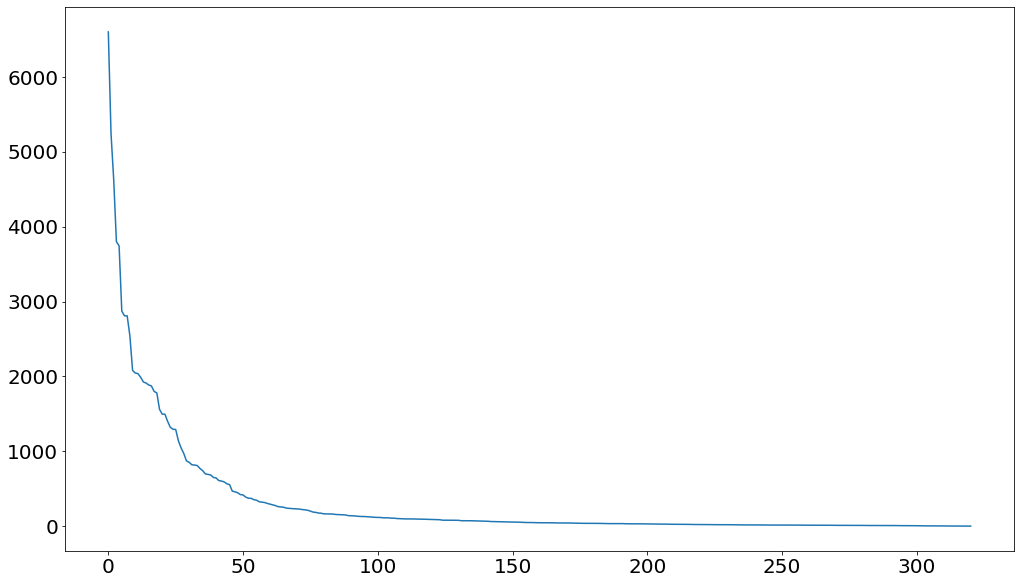

In [45]:
airfrom = Airline['ORIGIN_AIRPORT'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [46]:
Airline['ORIGIN_AIRPORT'] = Airline['ORIGIN_AIRPORT'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

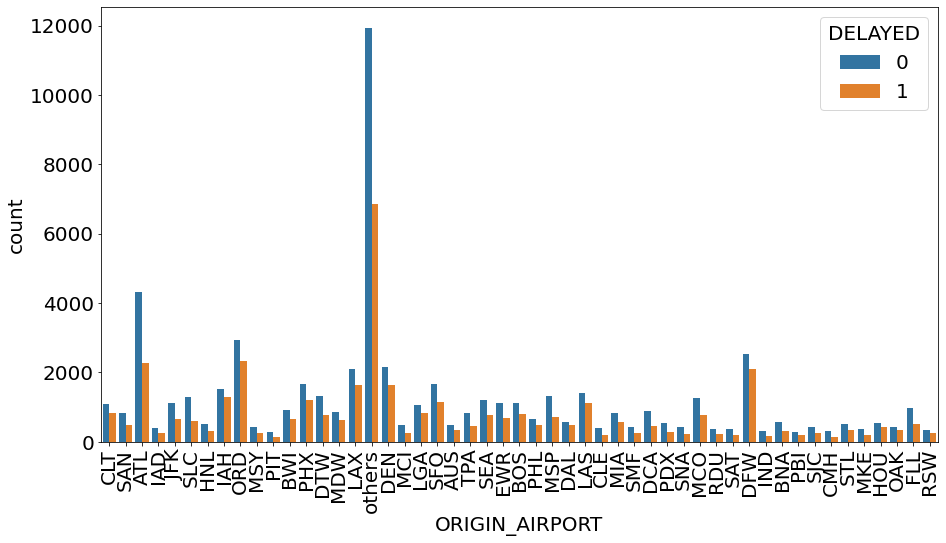

In [47]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='ORIGIN_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

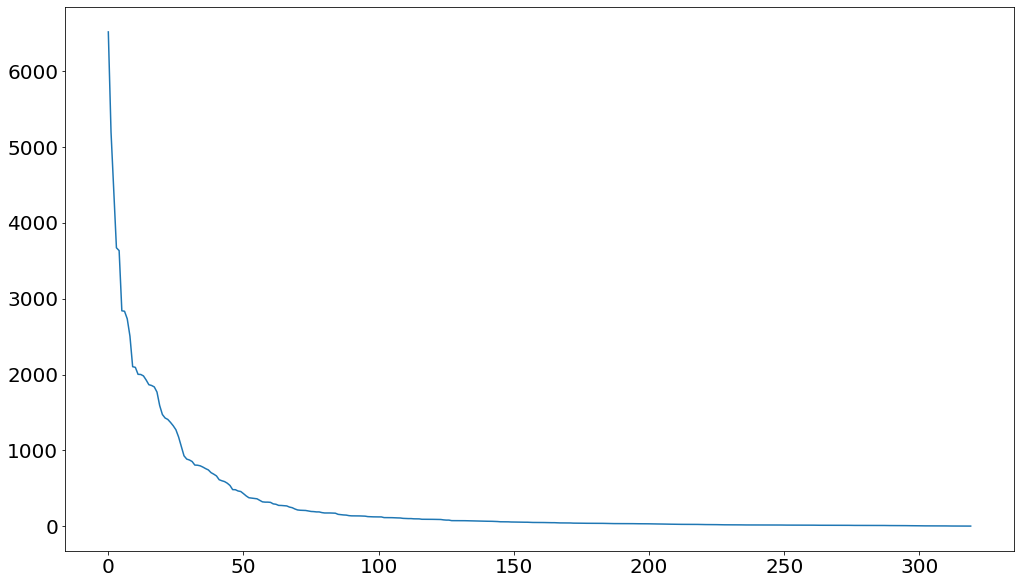

In [48]:
airto = Airline['DESTINATION_AIRPORT'].value_counts()
plt.plot(range(len(airto)), airto)

In [49]:
Airline['DESTINATION_AIRPORT'] = Airline['DESTINATION_AIRPORT'].apply(lambda s: s if str(s) in airto[:50] else 'others')

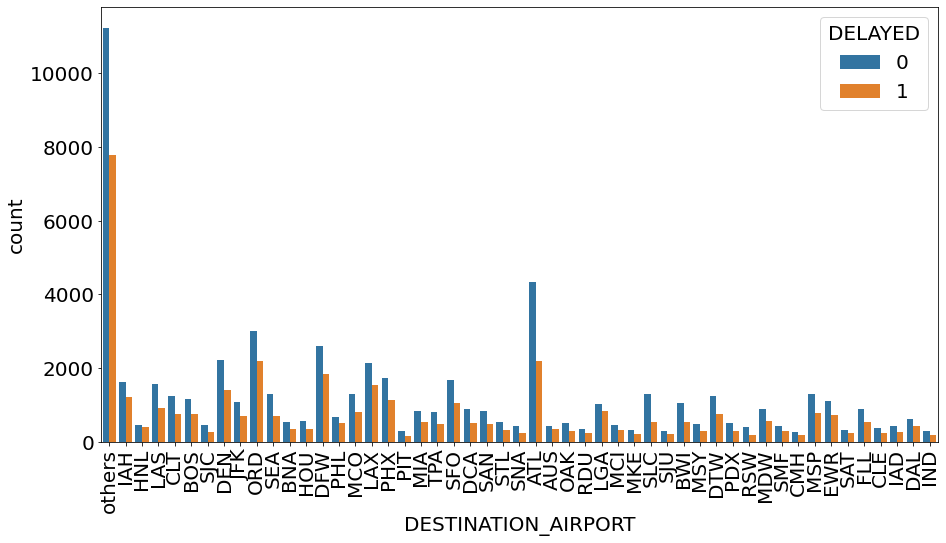

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='DESTINATION_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DAY', ylabel='count'>

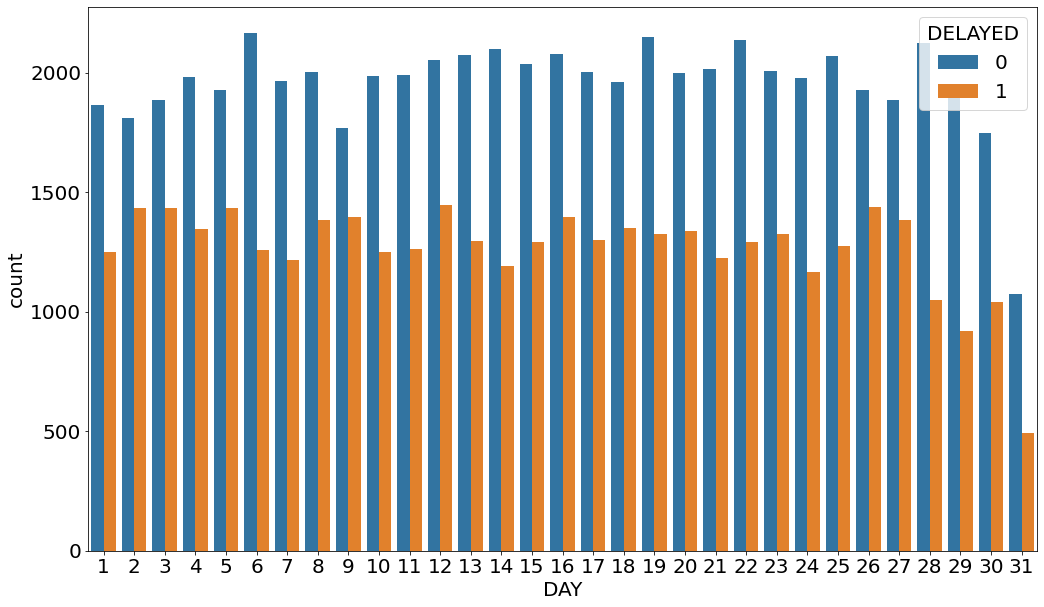

In [51]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')